In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
# Reduce dataset size for faster training
N_train = 5000
N_test = 1000
train_images = train_images[:N_train]
train_labels = train_labels[:N_train]
test_images = test_images[:N_test]
test_labels = test_labels[:N_test]

In [5]:
print(f"Train images shape: {train_images.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test images shape: {test_images.shape}")
print(f"Test labels shape: {test_labels.shape}")
print(f"Number of classes: {len(np.unique(train_labels))}")

Train images shape: (5000, 28, 28)
Train labels shape: (5000,)
Test images shape: (1000, 28, 28)
Test labels shape: (1000,)
Number of classes: 10


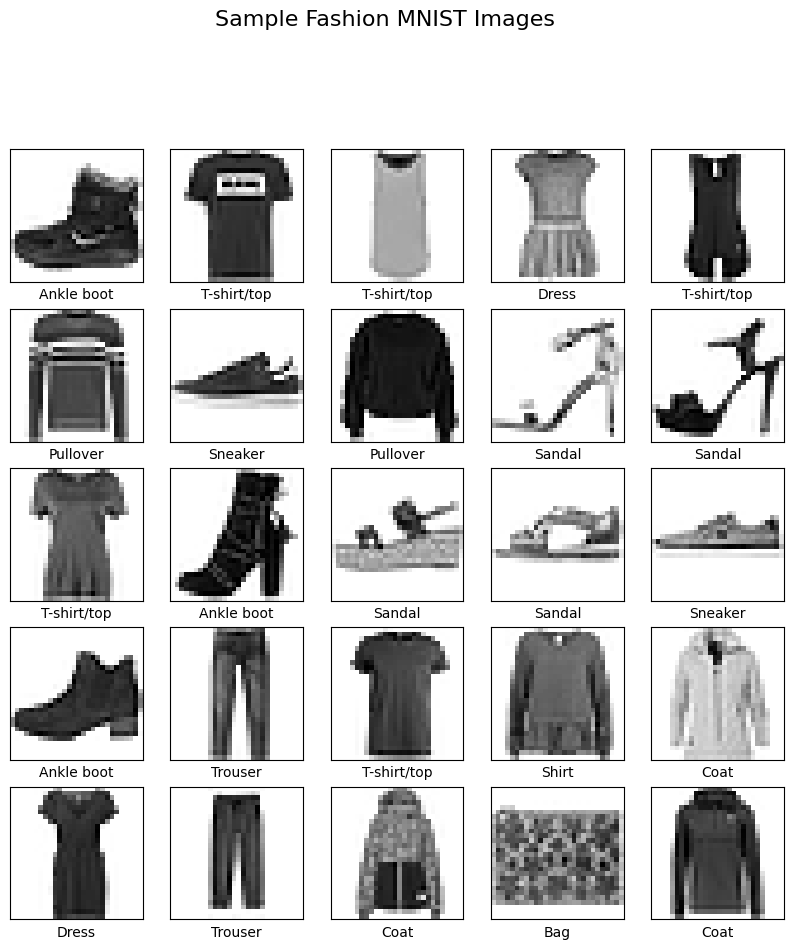

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.suptitle("Sample Fashion MNIST Images", y=1.02, fontsize=16)
plt.show()

In [7]:
print("\nTrain Label Distribution:")
unique_train_labels, counts_train_labels = np.unique(train_labels, return_counts=True)
for label, count in zip(unique_train_labels, counts_train_labels):
    print(f"{class_names[label]}: {count} samples")


Train Label Distribution:
T-shirt/top: 457 samples
Trouser: 556 samples
Pullover: 504 samples
Dress: 501 samples
Coat: 488 samples
Sandal: 493 samples
Shirt: 493 samples
Sneaker: 512 samples
Bag: 490 samples
Ankle boot: 506 samples


In [8]:
print("\nTest Label Distribution:")
unique_test_labels, counts_test_labels = np.unique(test_labels, return_counts=True)
for label, count in zip(unique_test_labels, counts_test_labels):
    print(f"{class_names[label]}: {count} samples")


Test Label Distribution:
T-shirt/top: 107 samples
Trouser: 105 samples
Pullover: 111 samples
Dress: 93 samples
Coat: 115 samples
Sandal: 87 samples
Shirt: 97 samples
Sneaker: 95 samples
Bag: 95 samples
Ankle boot: 95 samples


In [9]:
# Check pixel value range
print(f"\nMin pixel value: {train_images.min()}")
print(f"Max pixel value: {train_images.max()}")


Min pixel value: 0
Max pixel value: 255


In [10]:
train_images_cnn = train_images / 255.0
test_images_cnn = test_images / 255.0

In [11]:
# Reshape images to add a channel dimension (28, 28, 1) for CNN input
train_images_cnn = train_images_cnn.reshape((train_images_cnn.shape[0], 28, 28, 1))
test_images_cnn = test_images_cnn.reshape((test_images_cnn.shape[0], 28, 28, 1))

In [12]:
print(f"\nTrain images shape for CNN: {train_images_cnn.shape}")
print(f"Test images shape for CNN: {test_images_cnn.shape}")


Train images shape for CNN: (5000, 28, 28, 1)
Test images shape for CNN: (1000, 28, 28, 1)


In [13]:
train_images_flat = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images_flat = test_images.reshape(test_images.shape[0], -1) / 255.0

In [14]:
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat)
test_images_scaled = scaler.transform(test_images_flat)

In [15]:
print(f"Train images shape for Traditional ML (flattened): {train_images_flat.shape}")
print(f"Test images shape for Traditional ML (flattened): {test_images_flat.shape}")
print(f"Train images shape for Traditional ML (scaled): {train_images_scaled.shape}")
print(f"Test images shape for Traditional ML (scaled): {test_images_scaled.shape}")

Train images shape for Traditional ML (flattened): (5000, 784)
Test images shape for Traditional ML (flattened): (1000, 784)
Train images shape for Traditional ML (scaled): (5000, 784)
Test images shape for Traditional ML (scaled): (1000, 784)


In [16]:
print("\n--- Training Logistic Regression ---")
log_reg_model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=200, n_jobs=-1, verbose=0)
log_reg_model.fit(train_images_scaled, train_labels)
print("Logistic Regression training complete.")


--- Training Logistic Regression ---


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression training complete.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [17]:
print("\n--- Training Random Forest Classifier ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=0)
rf_model.fit(train_images_scaled, train_labels)
print("Random Forest Classifier training complete.")


--- Training Random Forest Classifier ---
Random Forest Classifier training complete.


In [18]:
# --- Model 3: Support Vector Machine (SVC) ---
print("\n--- Training Support Vector Machine (SVC) ---")
svm_model = SVC(kernel='rbf', random_state=42, verbose=False)
svm_model.fit(train_images_scaled, train_labels)
print("SVC training complete (full dataset).")


--- Training Support Vector Machine (SVC) ---
SVC training complete (full dataset).


In [19]:
print("\n--- Building and Training CNN ---")
# Define the CNN model architecture
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),  # Regularization to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # 10 classes, softmax for probability distribution
])


--- Building and Training CNN ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
history = cnn_model.fit(train_images_cnn, train_labels, epochs=10, validation_split=0.2, verbose=1)
print("CNN training complete.")

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.3496 - loss: 1.7914 - val_accuracy: 0.7300 - val_loss: 0.7505
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6458 - loss: 0.9902 - val_accuracy: 0.7660 - val_loss: 0.6089
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6976 - loss: 0.8247 - val_accuracy: 0.7570 - val_loss: 0.5992
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.7355 - loss: 0.7104 - val_accuracy: 0.8080 - val_loss: 0.5253
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7702 - loss: 0.6563 - val_accuracy: 0.8140 - val_loss: 0.5010
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.7472 - loss: 0.6644 - val_accuracy: 0.7940 - val_loss: 0.5019
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.7894 - loss: 0.5930 - val_accuracy: 0.8270 - val_loss: 0.4566
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.7951 - loss: 0.5567 - val_accu

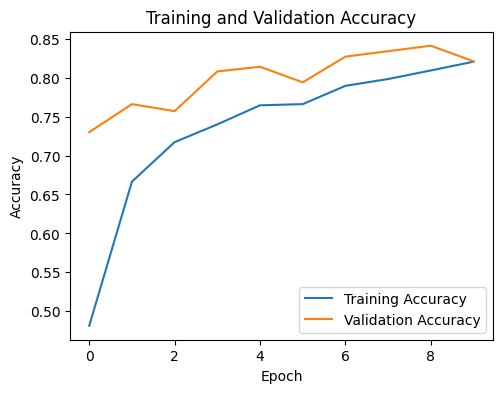

In [22]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

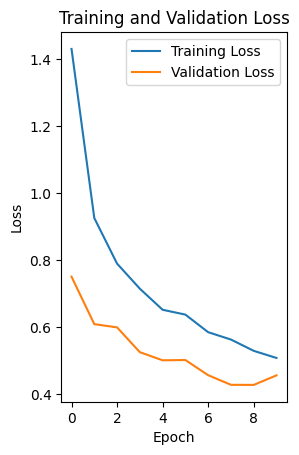

In [23]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


--- Evaluating Traditional Machine Learning Models ---

--- Logistic Regression ---
Accuracy: 0.8320
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.84      0.80      0.82       107
     Trouser       0.95      0.96      0.96       105
    Pullover       0.71      0.74      0.73       111
       Dress       0.78      0.81      0.79        93
        Coat       0.78      0.74      0.76       115
      Sandal       0.92      0.90      0.91        87
       Shirt       0.56      0.59      0.57        97
     Sneaker       0.92      0.94      0.93        95
         Bag       0.96      0.93      0.94        95
  Ankle boot       0.95      0.96      0.95        95

    accuracy                           0.83      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.83      0.83      0.83      1000



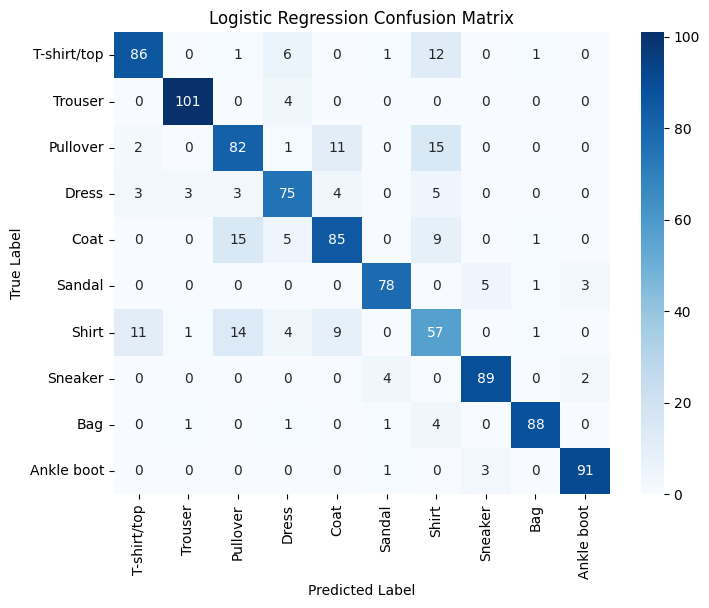


--- Random Forest ---
Accuracy: 0.8490
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.82      0.83       107
     Trouser       0.97      0.96      0.97       105
    Pullover       0.72      0.83      0.77       111
       Dress       0.80      0.89      0.84        93
        Coat       0.81      0.76      0.78       115
      Sandal       0.94      0.91      0.92        87
       Shirt       0.68      0.57      0.62        97
     Sneaker       0.90      0.88      0.89        95
         Bag       0.99      0.95      0.97        95
  Ankle boot       0.89      0.95      0.92        95

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



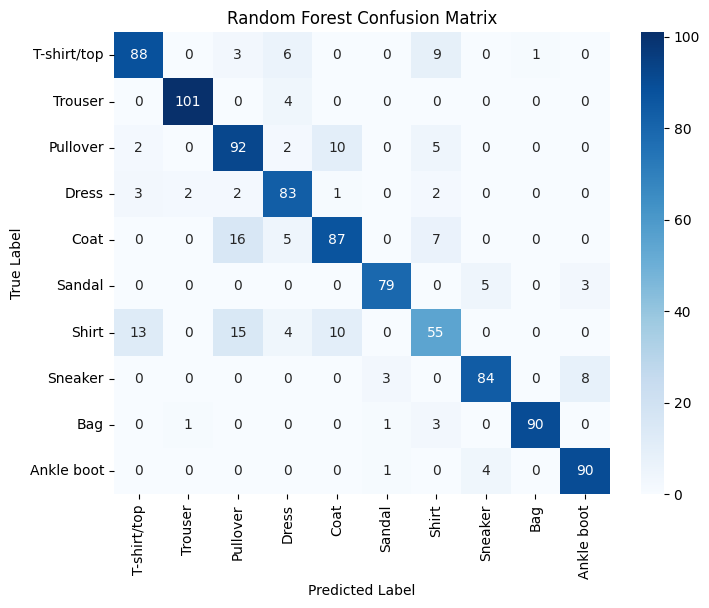


--- SVC ---
Accuracy: 0.8550
Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.83      0.82      0.83       107
     Trouser       0.97      0.96      0.97       105
    Pullover       0.78      0.79      0.79       111
       Dress       0.79      0.88      0.83        93
        Coat       0.86      0.81      0.83       115
      Sandal       0.93      0.89      0.91        87
       Shirt       0.66      0.63      0.65        97
     Sneaker       0.90      0.92      0.91        95
         Bag       0.93      0.95      0.94        95
  Ankle boot       0.92      0.93      0.92        95

    accuracy                           0.85      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.85      0.85      1000



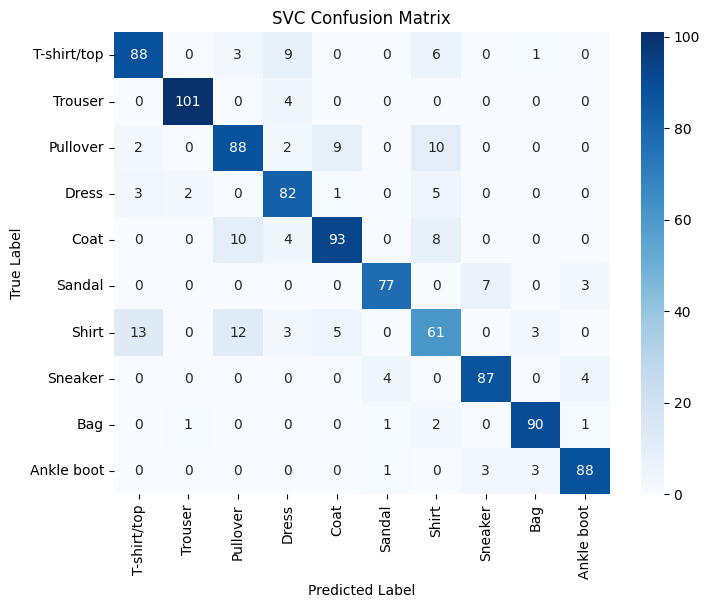

In [24]:
print("\n--- Evaluating Traditional Machine Learning Models ---")
models = {
    "Logistic Regression": log_reg_model,
    "Random Forest": rf_model,
    "SVC": svm_model
}
results = {}

for name, model in models.items():
    print(f"\n--- {name} ---")
    predictions = model.predict(test_images_scaled)
    accuracy = accuracy_score(test_labels, predictions)
    report = classification_report(test_labels, predictions, target_names=class_names, zero_division=0)
    cm = confusion_matrix(test_labels, predictions)
    results[name] = {
        "accuracy": accuracy,
        "report": report,
        "confusion_matrix": cm
    }
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [25]:
print("\n--- Evaluating Convolutional Neural Network (CNN) ---")
loss, accuracy = cnn_model.evaluate(test_images_cnn, test_labels, verbose=0)
print(f"CNN Test Loss: {loss:.4f}")
print(f"CNN Test Accuracy: {accuracy:.4f}")


--- Evaluating Convolutional Neural Network (CNN) ---
CNN Test Loss: 0.5278
CNN Test Accuracy: 0.8200


In [26]:
# Get predictions and classification report for CNN
cnn_pred_probs = cnn_model.predict(test_images_cnn)
cnn_predictions = np.argmax(cnn_pred_probs, axis=1)
cnn_report = classification_report(test_labels, cnn_predictions, target_names=class_names, zero_division=0)
cnn_cm = confusion_matrix(test_labels, cnn_predictions)

results["CNN"] = {
    "accuracy": accuracy,
    "report": cnn_report,
    "confusion_matrix": cnn_cm
}

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [27]:
print("CNN Classification Report:\n", cnn_report)

CNN Classification Report:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.81      0.82       107
     Trouser       0.99      0.97      0.98       105
    Pullover       0.70      0.75      0.72       111
       Dress       0.79      0.88      0.83        93
        Coat       0.68      0.90      0.77       115
      Sandal       0.96      0.84      0.90        87
       Shirt       0.54      0.28      0.37        97
     Sneaker       0.88      0.86      0.87        95
         Bag       1.00      0.95      0.97        95
  Ankle boot       0.84      0.96      0.90        95

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.81      1000
weighted avg       0.82      0.82      0.81      1000



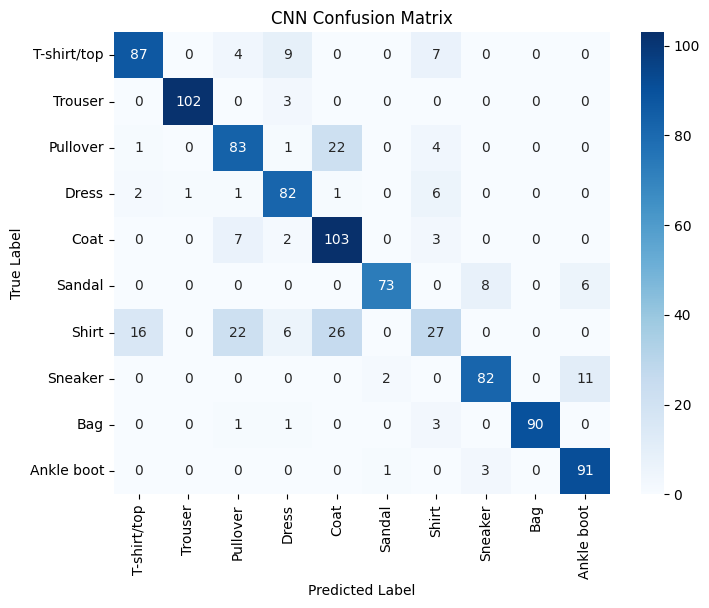

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('CNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [29]:
print("\n--- Summary of Model Performance (Test Accuracy) ---")
for name, data in results.items():
    print(f"{name}: {data['accuracy']:.4f}")


--- Summary of Model Performance (Test Accuracy) ---
Logistic Regression: 0.8320
Random Forest: 0.8490
SVC: 0.8550
CNN: 0.8200


In [30]:
# --- Making Predictions with Different Models ---
# Select a few random test images to make predictions on
num_predictions_to_show = 5
random_indices = np.random.choice(len(test_images), num_predictions_to_show, replace=False)


--- Making Predictions on Sample Test Images ---

--- Sample 1 (True Label: Sandal) ---


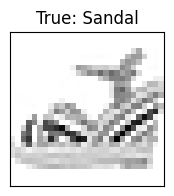

Logistic Regression Prediction: Sandal

--- Sample 2 (True Label: Shirt) ---


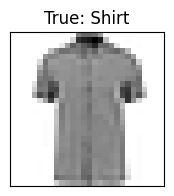

Logistic Regression Prediction: Shirt

--- Sample 3 (True Label: Shirt) ---


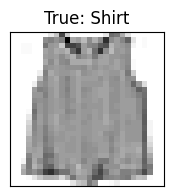

Logistic Regression Prediction: Shirt

--- Sample 4 (True Label: Coat) ---


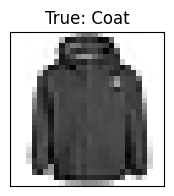

Logistic Regression Prediction: Coat

--- Sample 5 (True Label: Dress) ---


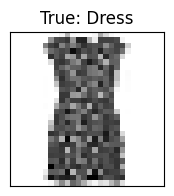

Logistic Regression Prediction: Dress


In [31]:
print("\n--- Making Predictions on Sample Test Images ---")
for i, idx in enumerate(random_indices):
    sample_image = test_images[idx]
    true_label = test_labels[idx]
    true_label_name = class_names[true_label]

    print(f"\n--- Sample {i+1} (True Label: {true_label_name}) ---")

    # Display the actual image
    plt.figure(figsize=(2,2))
    plt.imshow(sample_image, cmap=plt.cm.binary)
    plt.title(f"True: {true_label_name}")
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # Prediction with Logistic Regression
    lr_pred_input = test_images_scaled[idx].reshape(1, -1)
    lr_prediction = log_reg_model.predict(lr_pred_input)[0]
    print(f"Logistic Regression Prediction: {class_names[lr_prediction]}")

In [33]:
for i, idx in enumerate(random_indices):
  # Prediction with Logistic Regression
    lr_pred_input = test_images_scaled[idx].reshape(1, -1)
    lr_prediction = log_reg_model.predict(lr_pred_input)[0]
    print(f"Logistic Regression Prediction: {class_names[lr_prediction]}")

    # Prediction with Random Forest
    rf_pred_input = test_images_scaled[idx].reshape(1, -1)
    rf_prediction = rf_model.predict(rf_pred_input)[0]
    print(f"Random Forest Prediction: {class_names[rf_prediction]}")

     # Prediction with SVC
    svm_pred_input = test_images_scaled[idx].reshape(1, -1)
    svm_prediction = svm_model.predict(svm_pred_input)[0]
    print(f"SVC Prediction: {class_names[svm_prediction]}")

    # Prediction with CNN
    cnn_pred_input = test_images_cnn[idx].reshape(1, 28, 28, 1)  # Reshape for CNN
    cnn_pred_probs = cnn_model.predict(cnn_pred_input)[0]
    cnn_prediction = np.argmax(cnn_pred_probs)
    print(f"CNN Prediction: {class_names[cnn_prediction]} (Confidence: {np.max(cnn_pred_probs)*100:.2f}%)")
    print(f"CNN Top 3 Probabilities: ")
    top_3_indices = np.argsort(cnn_pred_probs)[::-1][:3]
    for k in top_3_indices:
        print(f" - {class_names[k]}: {cnn_pred_probs[k]*100:.2f}%")

Logistic Regression Prediction: Sandal
Random Forest Prediction: Sandal
SVC Prediction: Sandal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
CNN Prediction: Sandal (Confidence: 95.48%)
CNN Top 3 Probabilities: 
 - Sandal: 95.48%
 - Sneaker: 4.14%
 - Bag: 0.24%
Logistic Regression Prediction: Shirt
Random Forest Prediction: T-shirt/top
SVC Prediction: T-shirt/top
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
CNN Prediction: Shirt (Confidence: 48.18%)
CNN Top 3 Probabilities: 
 - Shirt: 48.18%
 - T-shirt/top: 44.62%
 - Dress: 5.15%
Logistic Regression Prediction: Shirt
Random Forest Prediction: Pullover
SVC Prediction: Shirt
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
CNN Prediction: Coat (Confidence: 36.74%)
CNN Top 3 Probabilities: 
 - Coat: 36.74%
 - Shirt: 27.03%
 - Pullover: 24.04%
Logistic Regression Prediction: Coat
Random Forest Prediction: Coat
SVC Prediction: Coat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
CNN Prediction: Coat (Confidence: 91.01%)
CNN Top 3 Probabilities: 
 - Coat: 91.01%
 - Pullover: 4.

In [34]:
print("\n--- Decision Making based on Model Performance ---")
print("Choosing the 'best' model depends on your specific needs:")


--- Decision Making based on Model Performance ---
Choosing the 'best' model depends on your specific needs:


In [35]:
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"\nBased purely on test accuracy, the best model is: {best_model_name} (Accuracy: {results[best_model_name]['accuracy']:.4f})")


Based purely on test accuracy, the best model is: SVC (Accuracy: 0.8550)


In [36]:
if best_model_name == "CNN":
    print("The CNN achieved the highest accuracy, which is typical for image classification.")
    print("Decision: If maximum accuracy is the primary goal, and computational resources (for training and inference) are not a constraint, the CNN is likely the best choice.")
    print("Considerations: CNNs require more computational power and data for training. They are typically less interpretable than traditional models.")
elif best_model_name in ["Logistic Regression", "Random Forest", "SVC"]:
    print(f"A traditional ML model ({best_model_name}) achieved the highest or comparable accuracy.")
    print("Decision: If interpretability, faster training times, or lower computational demands are crucial, a traditional model might be preferred, especially if its performance is close to or even surpasses deep learning for your specific dataset.")
    print("Considerations: Random Forests are good for feature importance. Logistic Regression is simple and interpretable. SVC can be powerful but slower on large datasets.")

A traditional ML model (SVC) achieved the highest or comparable accuracy.
Decision: If interpretability, faster training times, or lower computational demands are crucial, a traditional model might be preferred, especially if its performance is close to or even surpasses deep learning for your specific dataset.
Considerations: Random Forests are good for feature importance. Logistic Regression is simple and interpretable. SVC can be powerful but slower on large datasets.


In [37]:
print("\nFurther Considerations for Decision Making:")
print("- **Computational Resources:** Training and deploying complex CNNs can be expensive.")
print("- **Inference Speed:** Real-time applications might prefer faster, simpler models if accuracy difference is negligible.")
print("- **Interpretability:** Why did the model make a specific prediction? Traditional models often provide more transparency.")
print("- **Data Size:** Deep learning models typically require vast amounts of data to reach their full potential.")
print("- **Deployment Environment:** What kind of hardware is available for running the model in production?")


Further Considerations for Decision Making:
- **Computational Resources:** Training and deploying complex CNNs can be expensive.
- **Inference Speed:** Real-time applications might prefer faster, simpler models if accuracy difference is negligible.
- **Interpretability:** Why did the model make a specific prediction? Traditional models often provide more transparency.
- **Data Size:** Deep learning models typically require vast amounts of data to reach their full potential.
- **Deployment Environment:** What kind of hardware is available for running the model in production?


| # | New Data | Prediction | Decision |
|---|---|---|---|---|
| 1 | Sample Image 1 | Predicted Class: | Decision explanation |
|   | [Description of sample] | Probability distribution | |


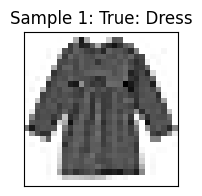

| 1 | Sample Image 1 (True: Dress) | Predicted Class: Dress | 
|   | Image features: (28, 28) | Confidence: 0.2604 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Dress: 0.2604 | |
|   | | 2. Shirt: 0.2594 | |
|   | | 3. Coat: 0.2302 | |


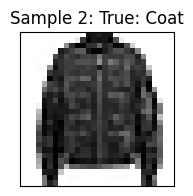

| 2 | Sample Image 2 (True: Coat) | Predicted Class: Coat | 
|   | Image features: (28, 28) | Confidence: 0.8264 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Coat: 0.8264 | |
|   | | 2. Pullover: 0.0868 | |
|   | | 3. Shirt: 0.0822 | |


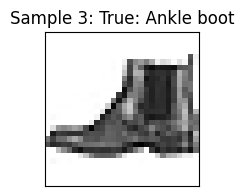

| 3 | Sample Image 3 (True: Ankle boot) | Predicted Class: Ankle boot | 
|   | Image features: (28, 28) | Confidence: 0.9988 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Ankle boot: 0.9988 | |
|   | | 2. Sneaker: 0.0012 | |
|   | | 3. Sandal: 0.0000 | |


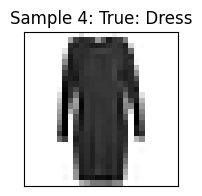

| 4 | Sample Image 4 (True: Dress) | Predicted Class: Dress | 
|   | Image features: (28, 28) | Confidence: 0.7781 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Dress: 0.7781 | |
|   | | 2. Coat: 0.1236 | |
|   | | 3. Shirt: 0.0580 | |


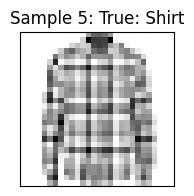

| 5 | Sample Image 5 (True: Shirt) | Predicted Class: Coat | 
|   | Image features: (28, 28) | Confidence: 0.4894 | Model: CNN |
|   | | Top 3 probabilities: | Incorrect prediction. Model confused Coat with Shirt. |
|   | | 1. Coat: 0.4894 | |
|   | | 2. Shirt: 0.2620 | |
|   | | 3. Pullover: 0.2357 | |


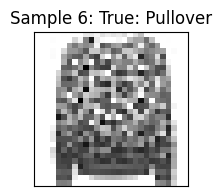

| 6 | Sample Image 6 (True: Pullover) | Predicted Class: Pullover | 
|   | Image features: (28, 28) | Confidence: 0.3949 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Pullover: 0.3949 | |
|   | | 2. Shirt: 0.3003 | |
|   | | 3. Coat: 0.2250 | |


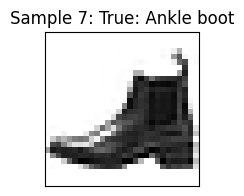

| 7 | Sample Image 7 (True: Ankle boot) | Predicted Class: Ankle boot | 
|   | Image features: (28, 28) | Confidence: 0.9982 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Ankle boot: 0.9982 | |
|   | | 2. Sneaker: 0.0017 | |
|   | | 3. Sandal: 0.0000 | |


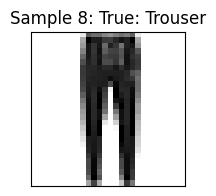

| 8 | Sample Image 8 (True: Trouser) | Predicted Class: Trouser | 
|   | Image features: (28, 28) | Confidence: 1.0000 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Trouser: 1.0000 | |
|   | | 2. Dress: 0.0000 | |
|   | | 3. T-shirt/top: 0.0000 | |


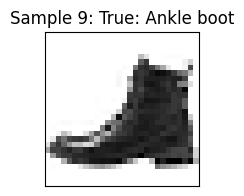

| 9 | Sample Image 9 (True: Ankle boot) | Predicted Class: Ankle boot | 
|   | Image features: (28, 28) | Confidence: 0.9981 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Ankle boot: 0.9981 | |
|   | | 2. Sneaker: 0.0019 | |
|   | | 3. Sandal: 0.0000 | |


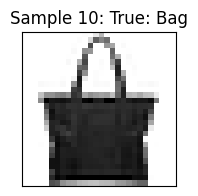

| 10 | Sample Image 10 (True: Bag) | Predicted Class: Bag | 
|   | Image features: (28, 28) | Confidence: 1.0000 | Model: CNN |
|   | | Top 3 probabilities: | Correct prediction. The model accurately classified this fashion item. |
|   | | 1. Bag: 1.0000 | |
|   | | 2. Sneaker: 0.0000 | |
|   | | 3. Shirt: 0.0000 | |


In [38]:
# testing data --

# Select new test data for prediction
num_test_samples = 10
test_indices = np.random.choice(len(test_images), num_test_samples, replace=False)

# Create the output table
print("| # | New Data | Prediction | Decision |")
print("|---|---|---|---|---|")
print("| 1 | Sample Image 1 | Predicted Class: | Decision explanation |")
print("|   | [Description of sample] | Probability distribution | |")

for i, idx in enumerate(test_indices, 1):
    sample_image = test_images[idx]
    true_label = test_labels[idx]
    true_label_name = class_names[true_label]

    # Get predictions from all models
    # CNN prediction
    cnn_pred_input = test_images_cnn[idx].reshape(1, 28, 28, 1)
    cnn_pred_probs = cnn_model.predict(cnn_pred_input, verbose=0)[0]
    cnn_prediction = np.argmax(cnn_pred_probs)
    cnn_confidence = np.max(cnn_pred_probs)

    # Traditional model predictions (using Random Forest as example)
    rf_pred_input = test_images_scaled[idx].reshape(1, -1)
    rf_prediction = rf_model.predict(rf_pred_input)[0]
    rf_probs = rf_model.predict_proba(rf_pred_input)[0]

    # Display the sample image
    plt.figure(figsize=(2,2))
    plt.imshow(sample_image, cmap=plt.cm.binary)
    plt.title(f"Sample {i}: True: {true_label_name}")
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # Print prediction results in table format
    print(f"| {i} | Sample Image {i} (True: {true_label_name}) | Predicted Class: {class_names[cnn_prediction]} | ")
    print(f"|   | Image features: {sample_image.shape} | Confidence: {cnn_confidence:.4f} | Model: CNN |")

    # Add decision explanation
    if cnn_prediction == true_label:
        decision = "Correct prediction. The model accurately classified this fashion item."
    else:
        decision = f"Incorrect prediction. Model confused {class_names[cnn_prediction]} with {true_label_name}."

    print(f"|   | | Top 3 probabilities: | {decision} |")

    # Show top 3 predictions
    top_3_indices = np.argsort(cnn_pred_probs)[::-1][:3]
    for j, class_idx in enumerate(top_3_indices, 1):
        prob = cnn_pred_probs[class_idx]
        print(f"|   | | {j}. {class_names[class_idx]}: {prob:.4f} | |")